### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [203]:
data = pd.read_csv('data/coupons.csv')

In [204]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [205]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
data.isna().sum()


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [207]:
#for each of remaining columns, i'm checking what portion of it is missing
cardata=((data['car'].isnull().sum()/data.shape[0])*100)
print('Percent of missing data is', cardata)

Percent of missing data is 99.14853358561967


Clearly, I should drop the entire Car column, because 99% of the data is missing.

In [208]:
#checking portion of missing coffee data
Coffeedata=((data['CoffeeHouse'].isnull().sum()/data.shape[0])*100)
print('Percent of missing data is', Coffeedata)

Percent of missing data is 1.7108167770419427


In [209]:
coffeecolumn=data['CoffeeHouse'].value_counts()
print(coffeecolumn)

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


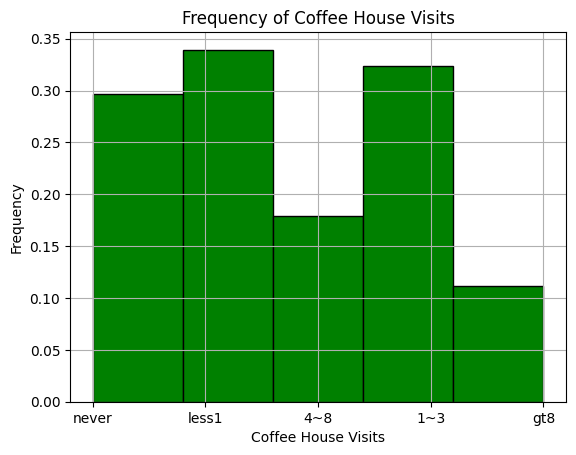

In [210]:
#lets plot coffee
ax=data['CoffeeHouse'].hist(bins=5, density=True, stacked=True, color='green', edgecolor='black')
plt.xlabel("Coffee House Visits")
plt.ylabel("Frequency")
plt.title("Frequency of Coffee House Visits")
plt.show()

In [211]:
#percent of total that should be each category for coffeehouse
data['CoffeeHouse'].value_counts(normalize=True)
#what do i do here? use this distribution against my null values? i think i should drop the rows

,proportion
CoffeeHouse,
less1,0.271517
1~3,0.258683
never,0.237587
4~8,0.143098
gt8,0.089115


After looking at CoffeeHouse data, it will be difficult to assign a value that won't skew the data.  I will drop the rows that have null values in CoffeeHouse

In [212]:
#checking for bar data to see what i should do with it
bardata=data['Bar'].value_counts() #.idxmax()
print(bardata)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


I could replace null values in the Bar column with never or less1, but i think it is better to drop these rows.

In [213]:
#check for carry out
carryoutdata=data['CarryAway'].value_counts()
print(carryoutdata)
#about 50 50 for 1-3 or 4-8

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


I could assign CarryAway null values by giving half of them the value of 1-3 and the other half 4-8, but i would rather drop these rows instead of guessing.

In [214]:
#check for RestaurantLessThan20
RestaurantLessThan20data=data['RestaurantLessThan20'].value_counts()
print(RestaurantLessThan20data)
#majority is 1-3

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


Text(0.5, 1.0, 'Cheap Restaurant Acceptance by Destination')

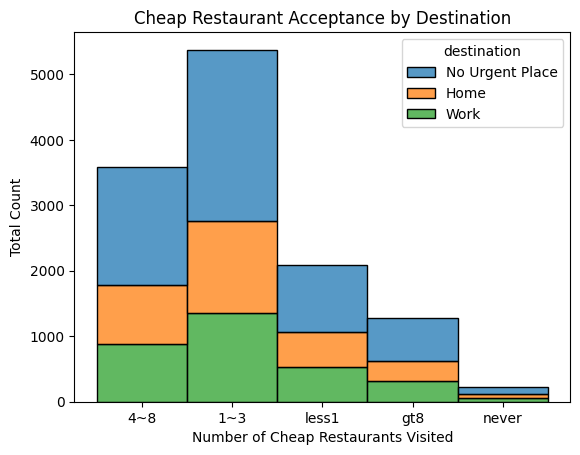

In [215]:
sns.histplot(data=data, x='RestaurantLessThan20', hue='destination', bins=5, stat='count', multiple='stack')
plt.xlabel("Number of Cheap Restaurants Visited")
plt.ylabel("Total Count")
plt.title("Cheap Restaurant Acceptance by Destination")

For RestaurantLessThan20data, i can assign the null data a value of 1-3.  

In [216]:
#check for Restaurant20To50
Restaurant20To50data=data['Restaurant20To50'].value_counts()
print(Restaurant20To50data)
#make this less than 1


Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


Text(0.5, 1.0, 'Expensive Restaurant Acceptance by Destination')

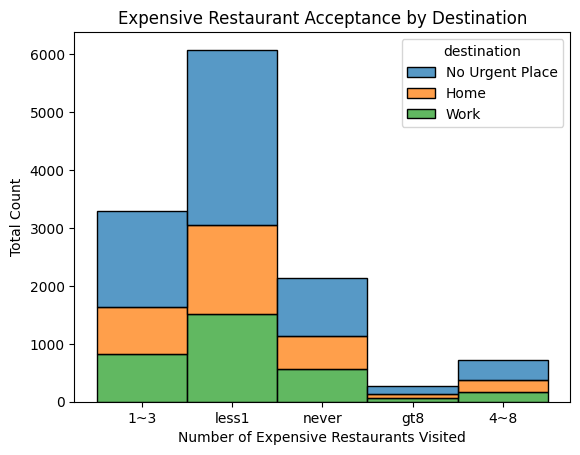

In [217]:
sns.histplot(data=data, x='Restaurant20To50', hue='destination', bins=5, stat='count', multiple='stack')
plt.xlabel("Number of Expensive Restaurants Visited")
plt.ylabel("Total Count")
plt.title("Expensive Restaurant Acceptance by Destination")

For more expensive restaurants (Restaurant20To50) I can assign a value of less1

The section below is part 1 of the data cleansing section where I will address null values as indicated above:


1.   Drop the car column
1.   Fill null values in Bar column with "never"
2.   Fill null values in Restaurant20to50 with "less1"
1.   Fill null values in RestaurantLess20 with "1-3"
2.   Drop null rows for CoffeeHouse
2.   Drop null rows for CarryAway



In [218]:
#drop car column
if 'car' in data.columns:
    data.drop(columns=['car'], inplace=True, errors='ignore')

#fill bar data with never
data['Bar'].fillna('never', inplace=True)

#fill restaurant data Restaurant20To50
data['Restaurant20To50'].fillna('less1', inplace=True)

#fill in data for RestaurantLessThan20 making it 1-3
data['RestaurantLessThan20'].fillna('1~3', inplace=True)

#drop carry out nans
data.dropna(subset=['CarryAway'], inplace=True)

#drop coffeehouse nans
data.dropna(subset=['CoffeeHouse'], inplace=True)

#check null values again
data.isna().sum()


#fill bar data with never
data['Bar'].fillna('never', inplace=True)

#fill restaurant data Restaurant20To50
data['Restaurant20To50'].fillna('less1', inplace=True)

#fill in data for RestaurantLessThan20 making it 1-3
data['RestaurantLessThan20'].fillna('1~3', inplace=True)

#drop carry out nans
data.dropna(subset=['CarryAway'], inplace=True)

#drop coffeehouse nans
data.dropna(subset=['CoffeeHouse'], inplace=True)

#check null values again
data.isna().sum()



<ipython-input-218-7f5c028ccc02>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bar'].fillna('never', inplace=True)
<ipython-input-218-7f5c028ccc02>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


This section is part 2 of data cleansing where I clean the data that exists by putting it into more meaningful formats.  Changes include


1.   Fix spelling of passenger column
2.   Rename column headings from 'toCoupons_GEQ%min' to something easier to retype
1.   Change the data in the 'age' column to a number
2.   Change coupon offerings columns 'Coupon_%mins' to a numberic value
1.   Create a column that sums the values of the coupon offerings
2.   Change the data in 'time' to military time so it is in the right order








In [253]:
#spelling for passanger
data.rename(columns={'passanger':'passenger'}, inplace=True)

#change toCoupon_GEQ5min to something easier
data.rename(columns={'toCoupon_GEQ5min':'Coupon_5mins'}, inplace=True)
data.rename(columns={'toCoupon_GEQ15min':'Coupon_15mins'}, inplace=True)
data.rename(columns={'toCoupon_GEQ25min':'Coupon_25mins'}, inplace=True)

#number for age
#data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'] = data['age'].astype('Int64')

#change coupon distance to numerical values
data['Coupon_5mins'] = pd.to_numeric(data['Coupon_5mins'], errors='coerce')
data['Coupon_15mins'] = pd.to_numeric(data['Coupon_15mins'], errors='coerce')
data['Coupon_25mins'] = pd.to_numeric(data['Coupon_15mins'], errors='coerce')


#create a summary column to see if people accept the coupon more than once
#this is the column that will be used to identify our customer characteristics
data['combined_coupons'] = data['Coupon_5mins'] + data['Coupon_15mins'] + data['Coupon_25mins']
data['combined_coupons'].value_counts()

#change the time column to reflect military time
data['time'] = data['time'].replace('12AM', '0000')
data['time'] = data['time'].replace('10AM', '1000')
data['time'] = data['time'].replace('2PM', '1400')
data['time'] = data['time'].replace('6PM', '1800')
data['time'] = data['time'].replace('10PM', '2200')
data['time'] = data['time'].replace('7AM', '0700')
data['time']=pd.to_numeric(data['time'], errors='coerce')
data['age'].value_counts()


,count
age,
21,2603
26,2415
31,2012
36,1275
41,1087
46,686


Now that I have completed the data cleansing for the columns of data I need (not all columns), let me explain the reason I created a column called 'combined_coupons'. According to the data, everyone in the entire dataset accepted the coupon at the 5 minute mark (Coupon_5mins)  You will see this demonstrated under question 4.

The combined coupons shows that there are only values of 1 and 3. None of the population scored 2.

The outcome of 1 and 3 demonstrates that the same 50% that accepted at 25mins accepted again at 15min and 5min.  Since no one showed up as 2, then we can conclude those who accepted at 25 mins were exactly the same as those who accepted at 15 and 5. the remaining 50% are those who accepted only within 5 mins. There is also a possibility that if you accept at 25 min, and are still on the way to that destination at 15 and 5 mins, you are counted as accepting the coupon each time.  



4. What proportion of the total observations chose to accept the coupon?



In [220]:
#check for value of 1 in coupon acceptance in specific columns

fivemins=((data['Coupon_5mins'].value_counts()/data.shape[0])*100)
print(fivemins)

Coupon_5mins
1    100.0
Name: count, dtype: float64


In [221]:
#creating the two data frames that i can use to define customer characteristics
#one for those who accepted 3 and one for those who accepted 1
#this table can be used for analysis later to understand user attributes

accepted_all_coupons = data[data['combined_coupons'] == 3]
accepted_all_coupons_ratio = len(accepted_all_coupons) / len(data)
print(accepted_all_coupons_ratio)
accepted_5mins_coupons = data[data['combined_coupons'] == 1]
accepted_5mins_coupons_ratio = len(accepted_5mins_coupons) / len(data)
print("All coupons percentage is", accepted_all_coupons_ratio)
print("Five min coupons percentage is",accepted_5mins_coupons_ratio)

0.5619032205858553
All coupons percentage is 0.5619032205858553
Five min coupons percentage is 0.4380967794141447


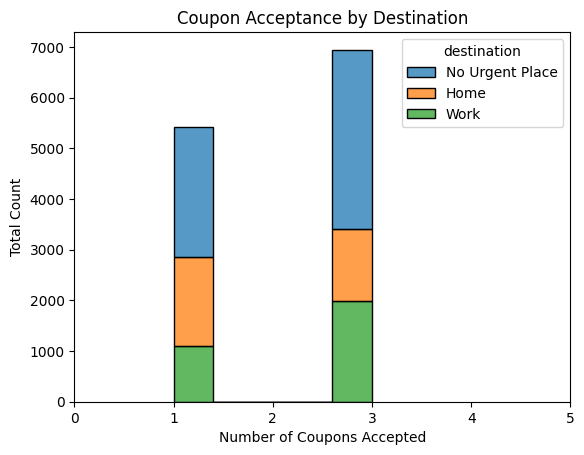

In [222]:
#visualize the combined_coupons and show destination
sns.histplot(data=data, x='combined_coupons', hue='destination', bins=5, stat='count', multiple='stack')
plt.xlabel("Number of Coupons Accepted")
plt.ylabel("Total Count")
plt.title("Coupon Acceptance by Destination")
plt.xlim(0,5)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [223]:
#Create a plot showing the value counts for each type of coupon
ratios=data['coupon'].value_counts()
print(ratios)


coupon
Coffee House             3888
Restaurant(<20)          2714
Carry out & Take away    2340
Bar                      1963
Restaurant(20-50)        1453
Name: count, dtype: int64


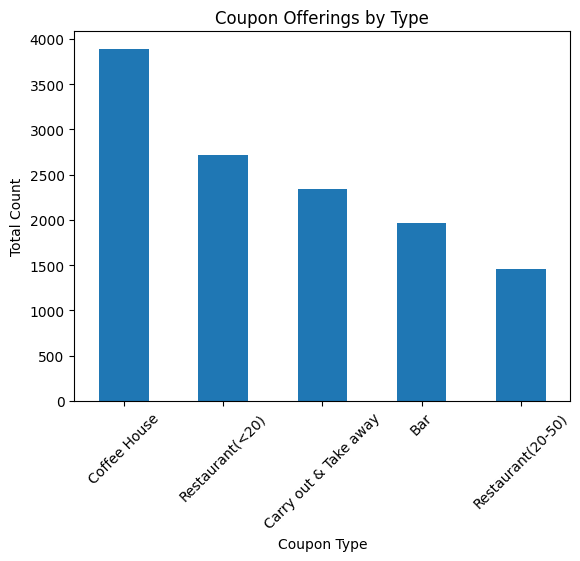

In [224]:
#barplot to visualize coupon column
ratios.plot(kind='bar')
plt.xlabel("Coupon Type")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.title("Coupon Offerings by Type")
plt.show()

coupon
Coffee House             2024
Carry out & Take away    1486
Bar                      1305
Restaurant(<20)          1208
Restaurant(20-50)         921
Name: count, dtype: int64


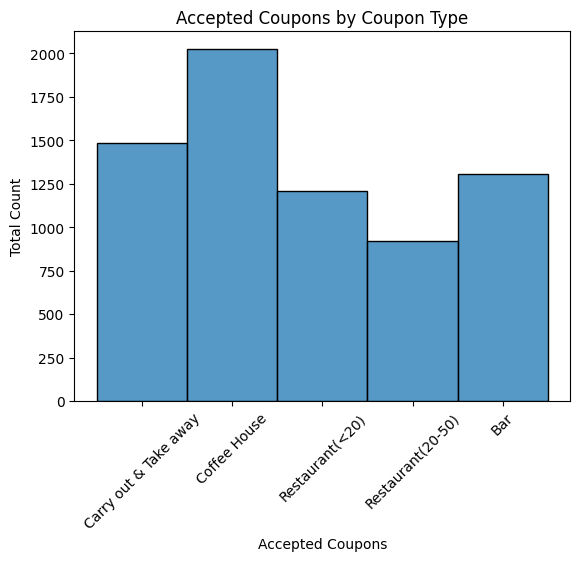

In [225]:
#try the same but by accepted subset
ratios_accepted=accepted_all_coupons['coupon'].value_counts()
print(ratios_accepted)
sns.histplot(data=accepted_all_coupons, x='coupon', multiple='stack')
plt.xlabel("Accepted Coupons")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.title("Accepted Coupons by Coupon Type")
plt.show()

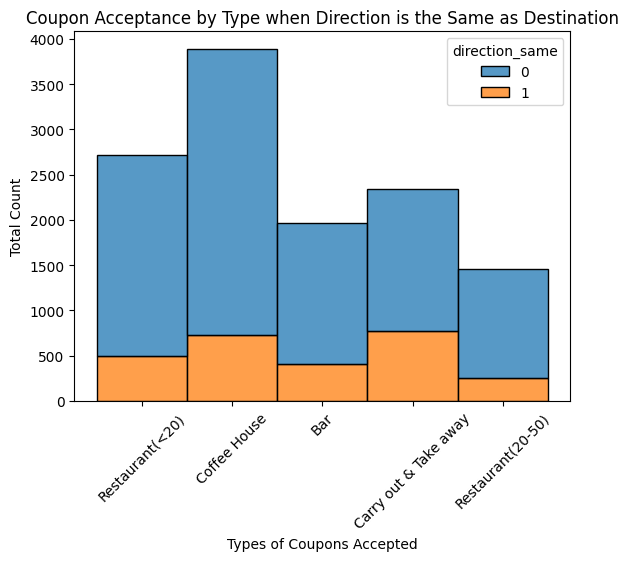

In [226]:
#histplot showing coupons
sns.histplot(data=data, x='coupon', hue='direction_same', multiple='stack')
plt.xlabel("Types of Coupons Accepted")
plt.ylabel("Total Count")
plt.title("Coupon Acceptance by Type when Direction is the Same as Destination")
plt.xticks(rotation=45)
plt.show()
#change orientation of x-axis labels


6. Use a histogram to visualize the temperature column.

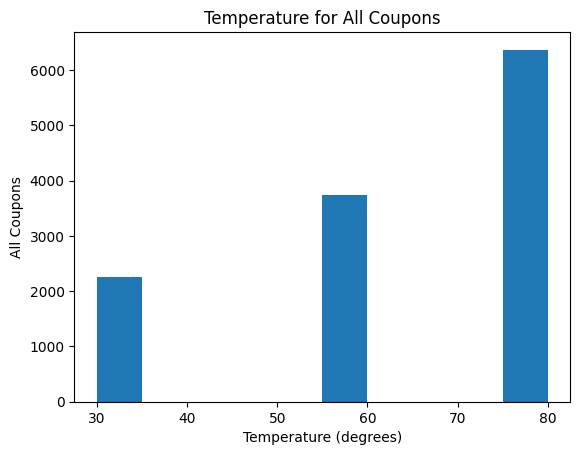

In [227]:
#histogram of temperature column
ax=data['temperature'].hist(bins=10, density=True, stacked=True, color='green', alpha=0.6)
data['temperature'].plot(kind='hist')
plt.xlabel("Temperature (degrees)")
plt.ylabel("All Coupons")
plt.title("Temperature for All Coupons")
plt.show()

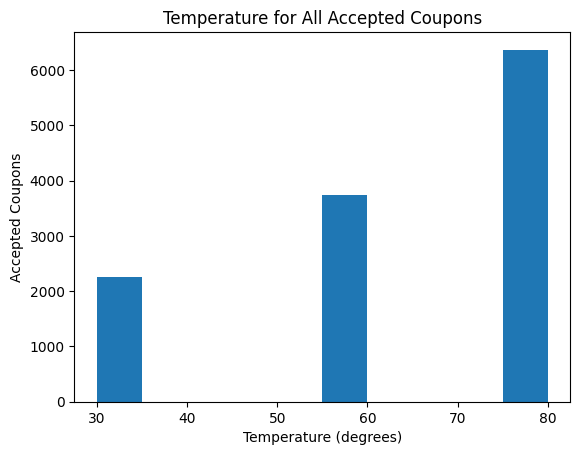

In [228]:
#histogram of temperature column for accepted coupons
ax=accepted_all_coupons['temperature'].hist(bins=10, density=True, stacked=True, color='green', alpha=0.6)
data['temperature'].plot(kind='hist')
plt.xlabel("Temperature (degrees)")
plt.ylabel("Accepted Coupons")
plt.title("Temperature for All Accepted Coupons")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [229]:
data['coupon'].value_counts()

,count
coupon,
Coffee House,3888
Restaurant(<20),2714
Carry out & Take away,2340
Bar,1963
Restaurant(20-50),1453


In [230]:
#new dataframe where coupon is bar
bar_coupon=data[data['coupon']=='Bar']
bar_coupon.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,Coupon_5mins,Coupon_15mins,Coupon_25mins,direction_same,direction_opp,Y,combined_coupons
24,No Urgent Place,Friend(s),Sunny,80,1000,Bar,1d,Male,21.0,Single,...,4~8,4~8,less1,1,0,0,0,1,1,1
35,Home,Alone,Sunny,55,1800,Bar,1d,Male,21.0,Single,...,4~8,4~8,less1,1,0,0,1,0,1,1
39,Work,Alone,Sunny,55,700,Bar,1d,Male,21.0,Single,...,4~8,4~8,less1,1,1,1,0,1,1,3
46,No Urgent Place,Friend(s),Sunny,80,1000,Bar,1d,Male,46.0,Single,...,1~3,1~3,never,1,0,0,0,1,0,1
57,Home,Alone,Sunny,55,1800,Bar,1d,Male,46.0,Single,...,1~3,1~3,never,1,0,0,1,0,0,1


2. What proportion of bar coupons were accepted?


In [231]:

#bar acceptance rate where combined_coupon is 1
# Calculate acceptance rate for bar coupons
accepted_bar_coupons = bar_coupon[(bar_coupon['Coupon_5mins'] == 1) |
                                 (bar_coupon['Coupon_15mins'] == 1) |
                                 (bar_coupon['Coupon_25mins'] == 1)]
# Get the number of accepted bar coupons
num_accepted_bar_coupons = len(accepted_bar_coupons)

# Calculate the acceptance rate
bar_coupon_acceptance_rate = num_accepted_bar_coupons / len(bar_coupon)

# Print the acceptance rate
print(f"Proportion of bar coupons accepted once: {bar_coupon_acceptance_rate:.2f}")

Proportion of bar coupons accepted once: 1.00


The code above just demonstrates that all bar coupons were accepted once.  In fact, all coupons were accepted once at the Coupon_5min offering.  That means we need to look at only the subset of bar coupons accepted 3 times.

In [233]:

#now we will calculate the percent that were accepted three times
accepted_bar_coupons_all = bar_coupon[(bar_coupon['combined_coupons'] == 3)]
# Get the number of accepted bar coupons
num_accepted_bar_coupons_all = len(accepted_bar_coupons_all)

# Calculate the acceptance rate
bar_coupon_acceptance_rate_three = num_accepted_bar_coupons_all / len(bar_coupon)
print(f"Proportion of bar coupons accepted 3 times: {bar_coupon_acceptance_rate_three:.2f}")

Proportion of bar coupons accepted 3 times: 0.66


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [174]:
#for proportion, i need those low drinkers who accepted
#divided by the population of low drinkers overall
total_low_drinkers=bar_coupon[(bar_coupon['Bar']=='1~3') |
                       (bar_coupon['Bar']=="never")|
                       (bar_coupon['Bar']=="less1")]
print("The total number of low drinkers is", len(total_low_drinkers))

The total number of low drinkers is 1770


In [175]:
#proportion of low drinkers who accepted
three_x_bar=bar_coupon[(bar_coupon['Bar']=='1~3') |
                       (bar_coupon['Bar']=="never")|
                       (bar_coupon['Bar']=="less1") &
                       (bar_coupon['combined_coupons'] == 3)]
three_x_bar_acceptance_rate = len(three_x_bar) / len(total_low_drinkers)
print(len(three_x_bar))
print(len(total_low_drinkers))
print(f"Proportion of low drinkers accepting bar coupon: {three_x_bar_acceptance_rate:.2f}")


1585
1770
Proportion of low drinkers accepting bar coupon: 0.90


In [176]:
#now the same for heavy drinkers
#heavy drinkers who accepted
#divided by the population of heavy drinkers who accepted
bar_coupon['Bar'].value_counts()
pop_drinkers4=len(bar_coupon['Bar']=='4~8')
pop_drinkers8=len(bar_coupon['Bar']=="gt8")
pop_heavy_drinkers = (pop_drinkers4 + pop_drinkers8)
print(pop_heavy_drinkers)


3926


In [177]:
#those heavy drinkers who accepted coupon more than 3 times
three_m_bar=bar_coupon[(bar_coupon['Bar']=='4~8')|
              (bar_coupon['Bar']=="gt8") &
              (bar_coupon['combined_coupons']==3)]
three_m_bar_acceptance_rate = len(three_m_bar) / pop_heavy_drinkers
print(len(three_m_bar))
print(pop_heavy_drinkers)


print(f"Proportion of frequent bar visitors bar coupons accepted: {three_m_bar_acceptance_rate:.2f}")

176
3926
Proportion of frequent bar visitors bar coupons accepted: 0.04


I can interpret the low proportion of only 11 percent of drivers who frequent bars more then 4 times/month and accepted the coupon demonstrates that frequency of customer habits is not necessarily a driver for accepting the coupon.  Those who frequented bars less frequently accepted the coupon at 90%.  While this seems counterintuitive, it could be because those who like to drink are more picky about their bars.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [295]:
#acceptance rate for drivers who go to bar more than once a month over 25
#again, i'm using the 3 times acceptance to differentiate
driver_h=bar_coupon[(bar_coupon['Bar']=='1~3') |
              (bar_coupon['Bar']=="4~8") |
              (bar_coupon['Bar']=="gt8")]
driver_h_old=driver_h[(driver_h['age'] > 25) & (driver_h['combined_coupons']==3)]
print(len(driver_h_old))
print(len(bar_coupon))

print(f"Proportion of bar coupons accepted by bar frequenting drivers over 25: {driver_acceptance_rate:.2f}")

228
1963
Proportion of bar coupons accepted by bar frequenting drivers over 25: 0.30


This means that most of the frequent bar visiting drivers who accepted the coupon were over 25 years of age

In [294]:
#acceptance rate for drivers who go to bar more than once a month under 25
driver_h_young=driver_h[(driver_h['age'] < 25) & (driver_h['combined_coupons']==3)]
driver_h_young_acceptance_rate = len(driver_h_young) / len(bar_coupon)
print(driver_h_young_acceptance_rate)
print(len(bar_coupon))

print(f"Proportion of bar coupons accepted by younger drivers who frequent bars: {driver_h_young_acceptance_rate:.2f}")

0.05196128374936322
1963
Proportion of bar coupons accepted by younger drivers who frequent bars: 0.05


The results showed that for the population of those who frequented bars at least 4 times per month, the coupon was accepted 30% of the time when the driver was over 25
and only 5% of the time when the driver was under 25.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [180]:
data['passenger'].value_counts()

,count
passenger,
Alone,7149
Friend(s),3204
Partner,1031
Kid(s),974


In [181]:
data['occupation'].value_counts()


,count
occupation,
Unemployed,1814
Student,1563
Computer & Mathematical,1368
Sales & Related,1072
Education&Training&Library,899
Management,810
Office & Administrative Support,617
Arts Design Entertainment Sports & Media,607
Business & Financial,538


In [304]:
#calculate drivers who frequent bars more than 3xmonth, no kids as passengers
#did not work in forestry
no_passenger_driver=driver_h[(driver_h['passenger']!="Kid(s)") &
 (driver_h['occupation'] !="Farming Fishing & Forestry") &
                       (driver_h['combined_coupons']==3)]

no_passenger_driver_acceptance_rate = len(no_passenger_driver) / len(bar_coupon)
print(len(bar_coupon))

print(f"Accepted by drivers who frequent bars, passengers not kids, working not farming, fishing and forestry: {passenger_driver_acceptance_rate:.2f}")


1963
Proportion accepted 3x by drivers who frequent bars, passengers not kids, working farming, fishing and forestry: 0.71


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [183]:
data['maritalStatus'].value_counts()

,count
maritalStatus,
Married partner,4935
Single,4675
Unmarried partner,2114
Divorced,504
Widowed,130


In [310]:
no_passenger_driver_not_widow=driver_h[(driver_h['passenger']!="Kid(s)") &
 (driver_h['maritalStatus'] !="Widowed") &
                       (driver_h['combined_coupons']==3)]

no_passenger_driver_not_widow_acceptance_rate = len(no_passenger_driver_not_widow) / len(bar_coupon)
print(len(bar_coupon))

print(f"Accepted by drivers who frequent bars, passengers not kids, working not farming, fishing and forestry: {no_passenger_driver_not_widow_acceptance_rate:.2f}")

1963
Accepted by drivers who frequent bars, passengers not kids, working not farming, fishing and forestry: 0.17


In [316]:
#go to bars more than once a month and are under the age of 30
under_thirty_driver=driver_h[(driver_h['age'] < 30)&
                       (driver_h['combined_coupons']==3)]

under_thirty_driver_acceptance_rate = len(under_thirty_driver) / len(bar_coupon)
print(len(bar_coupon))
print(f"Accepted by drivers who frequent bars, under 30: {under_thirty_driver_acceptance_rate:.2f}")

1963
Accepted by drivers who frequent bars, under 30: 0.10


In [186]:
data['income'].value_counts()

,count
income,
$25000 - $37499,1985
$12500 - $24999,1766
$37500 - $49999,1733
$100000 or More,1714
$50000 - $62499,1631
Less than $12500,1036
$62500 - $74999,840
$75000 - $87499,835
$87500 - $99999,818


Text(0.5, 1.0, 'Coupon Acceptance by Marital Status')

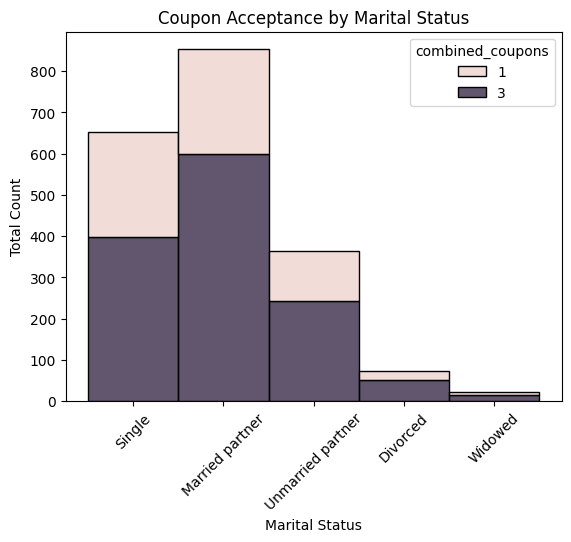

In [343]:
sns.histplot(data=bar_coupon, x='maritalStatus', hue='combined_coupons', bins=5, stat='count', multiple='stack')
plt.xlabel("Marital Status")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.title("Coupon Acceptance by Marital Status")

Text(0, 0.5, 'Total Count')

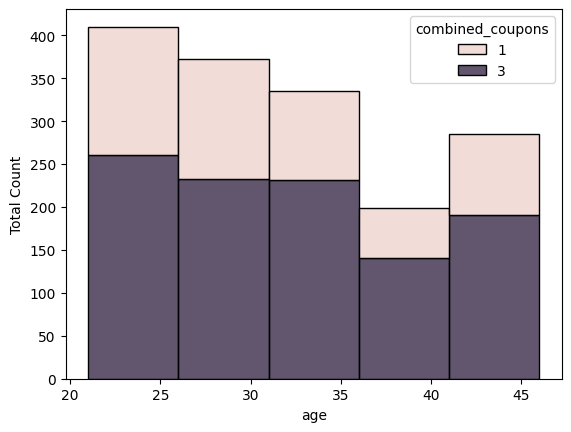

In [344]:
sns.histplot(data=bar_coupon, x='age', hue='combined_coupons', bins=5, stat='count', multiple='stack')
plt.xlabel("age")
plt.ylabel("Total Count")

In [337]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.

#data['RestaurantLessThan20'].value_counts()

cheapfood = data[(data['RestaurantLessThan20']=="4~8") |
 (data['RestaurantLessThan20']=="gt8")]
print(len(cheapfood))
cheapfood_lowincome =cheapfood[((cheapfood['income']=="$25000 - $37499") |
   (cheapfood['income']=="$37500 - $49999") |
    (cheapfood['income']=="$12500 - $24999")) &
                               (cheapfood['combined_coupons']==3)]
cheapfood_lowincome_acceptance_rate = len(cheapfood_lowincome) / len(data)
print(f"Cheap rest. frequenters with income under $50k: {cheapfood_lowincome_acceptance_rate:.2f}")

4757
Cheap rest. frequenters with income under $50k: 0.08


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?



*  Bar coupons were accepted 66% of the time
*  The vast majority of the drivers who accepted the bar coupon usually don’t frequent bars more than three times a month.
*  Drivers who frequent bar often and accepted the coupon tended to be over the age of 25
*   Drivers more than likely had no kids as passengers
*   Most are married
*   Ages vary though most are under 25









### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [188]:
#create a new dataframe for carryaway coupons
takeoutcoupon=data[data['coupon']=='Carry out & Take away']
takeoutcoupon

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,Coupon_5mins,Coupon_15mins,Coupon_25mins,direction_same,direction_opp,Y,combined_coupons
25,No Urgent Place,Friend(s),Sunny,80,1000,Carry out & Take away,2h,Male,21.0,Single,...,4~8,4~8,less1,1,1,1,0,1,0,3
33,No Urgent Place,Friend(s),Sunny,55,1400,Carry out & Take away,1d,Male,21.0,Single,...,4~8,4~8,less1,1,1,1,0,1,1,3
41,Work,Alone,Sunny,80,700,Carry out & Take away,2h,Male,21.0,Single,...,4~8,4~8,less1,1,0,0,1,0,1,1
47,No Urgent Place,Friend(s),Sunny,80,1000,Carry out & Take away,2h,Male,46.0,Single,...,1~3,1~3,never,1,1,1,0,1,1,3
55,No Urgent Place,Friend(s),Sunny,55,1400,Carry out & Take away,1d,Male,46.0,Single,...,1~3,1~3,never,1,1,1,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,1000,Carry out & Take away,2h,Male,26.0,Single,...,1~3,4~8,1~3,1,0,0,0,1,1,1
12672,Home,Alone,Sunny,80,1800,Carry out & Take away,2h,Male,26.0,Single,...,1~3,4~8,1~3,1,1,1,1,0,0,3
12673,Home,Alone,Sunny,30,1800,Carry out & Take away,1d,Male,26.0,Single,...,1~3,4~8,1~3,1,0,0,0,1,0,1
12679,Home,Partner,Rainy,55,1800,Carry out & Take away,1d,Male,26.0,Single,...,1~3,4~8,1~3,1,0,0,1,0,1,1


In [321]:
#the question asks about passengers
#look at drivers who accepted the carry out coupon and had passengers

takeout_driver_acceptance = takeoutcoupon[(takeoutcoupon['combined_coupons']==3) &
                                       (takeoutcoupon['passenger']!="Alone")]

print(len(takeout_driver_acceptance))
takeout_driver_acceptance_rate = len(takeout_driver_acceptance) / len(takeoutcoupon)
print(f"Carry Away coupons accepted from drivers with passengers: {takeout_driver_acceptance_rate:.2f}")


817
Carry Away coupons accepted from drivers with passengers: 0.35


About 35% of drivers who accepted carryout had passengers

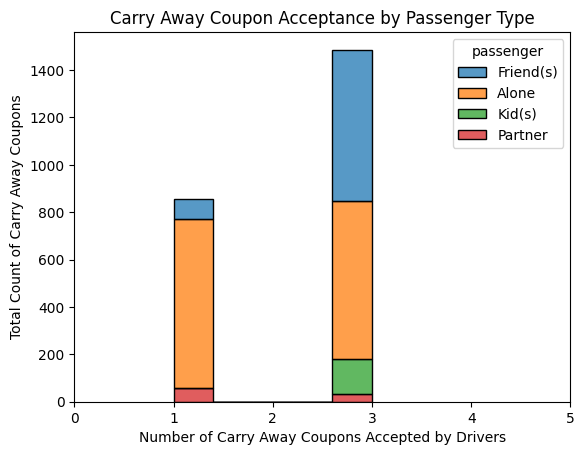

In [323]:
#visual of drivers by passengers who accepted CarryAway coupons
sns.histplot(data=takeoutcoupon, x='combined_coupons', hue='passenger', bins=5, multiple='stack')
plt.xlabel("Number of Carry Away Coupons Accepted by Drivers")
plt.ylabel("Total Count of Carry Away Coupons")
plt.title("Carry Away Coupon Acceptance by Passenger Type")
plt.xlim(0,5)
plt.show()

Drivers who accepted carry away (3 bar) were mostly alone with the remainder comprising 35%

Characteristics of Passengers of drivers who accepted CarryAway coupons:
30% chance they were alone
those who had passengers were most likely friends, with a smaller group having kids and an evern smaller group having partners as passengers.


The remaining cells are just additional analyses of drivers who accepted the CarryAway coupon type


*   drivers had 0 or 1 child (about 50-50)
*   direction did not matter. in fact, most of the acceptances were going in the wrong direction
*   cold temperatures accounted for much of the increase in carry away acceptance
*   carry away was the second largest coupon group after coffee_houses
*   there was a bigger proportion of acceptance for coupons with the shorter expiration dates









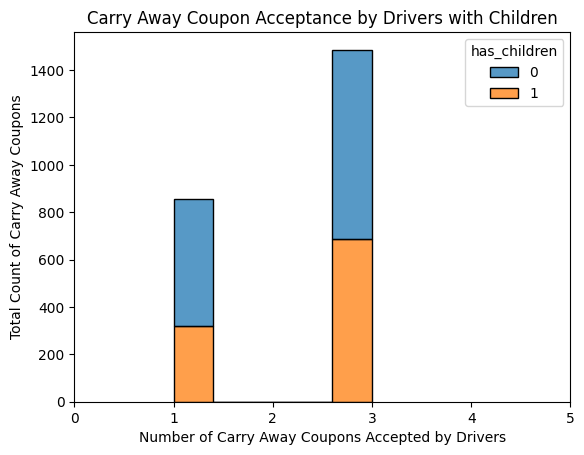

In [322]:
#visual of age and marital status for people who received takeoutcoupons
sns.histplot(data=takeoutcoupon, x=('combined_coupons'), hue= 'has_children', bins= 5, multiple='stack')
plt.xlabel("Number of Carry Away Coupons Accepted by Drivers")
plt.ylabel("Total Count of Carry Away Coupons")
plt.title("Carry Away Coupon Acceptance by Drivers with Children")
plt.xlim(0,5)
plt.show()

Having children did not have much of an impact on whether they accepted carryaway.

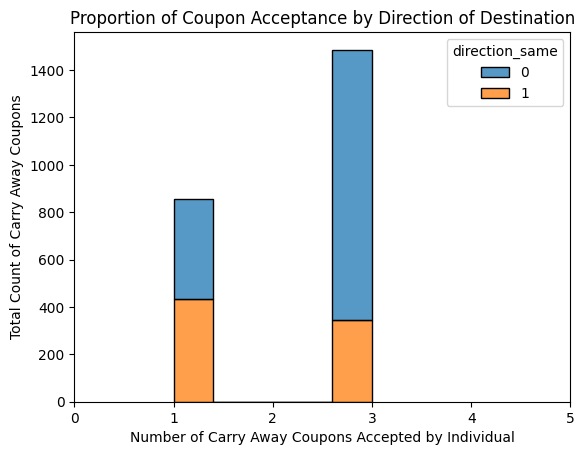

In [193]:
#visual of destination and direction for people who received takeoutcoupons
sns.histplot(data=takeoutcoupon, x='combined_coupons', hue='direction_same', bins=5, multiple='stack')
plt.xlabel("Number of Carry Away Coupons Accepted by Individual")
plt.ylabel("Total Count of Carry Away Coupons")
plt.title("Proportion of Coupon Acceptance by Direction of Destination")
plt.xlim(0,5)
plt.show()

In [ ]:
Direction was significant in whether they accepted the coupons for carry away.

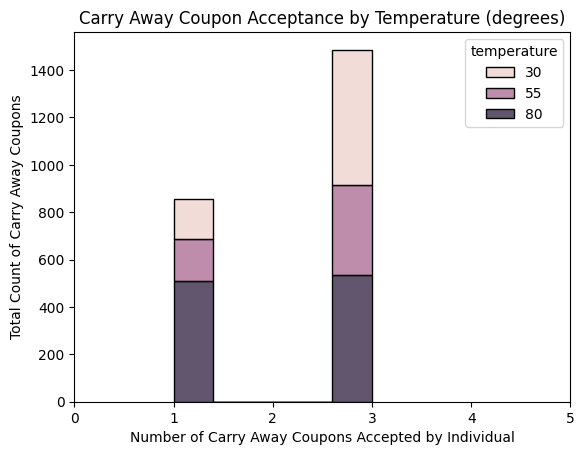

In [194]:
sns.histplot(data=takeoutcoupon, x='combined_coupons', hue='temperature', bins=5, multiple='stack')
plt.xlabel("Number of Carry Away Coupons Accepted by Individual")
plt.ylabel("Total Count of Carry Away Coupons")
plt.title("Carry Away Coupon Acceptance by Temperature (degrees)")
plt.xlim(0,5)
plt.show()

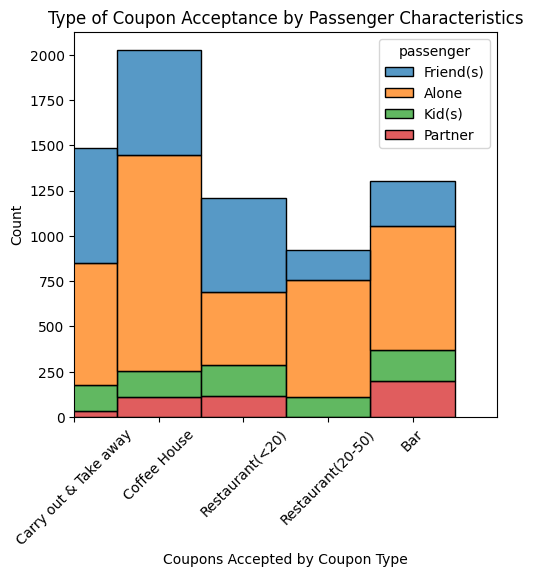

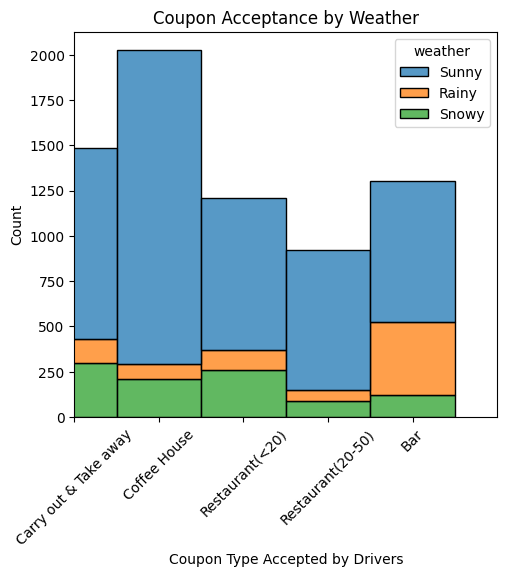

In [369]:
#overall coupon acceptance characteristics
#creationg a plot and subplot comparing accepted coupons with passenger type and accepted coupon by age, gender
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(data=accepted_all_coupons, x='coupon', hue='passenger', multiple='stack')
plt.xlabel("Coupons Accepted by Coupon Type")
plt.ylabel("Count")
plt.title("Type of Coupon Acceptance by Passenger Characteristics")
plt.xlim(0,5)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(122)
sns.histplot(data=accepted_all_coupons, x='coupon',  hue='weather', multiple='stack')
plt.xlabel("Coupon Type Accepted by Drivers")
plt.ylabel("Count")
plt.title("Coupon Acceptance by Weather")
plt.xlim(0,5)
plt.xticks(rotation=45)
plt.show()

Overall, Coffee Houses had the most coupon acceptances; accepted coupons happened on sunny days by a big margin and mostly involved drivers without passengers.

In [325]:
#what does crosstab show us about 1 day or 2 hour expiration?
pd.crosstab(data['expiration'], data['combined_coupons'])

combined_coupons,1,3
expiration,,
1d,3170,3758
2h,2244,3186


The crosstab shows that a larger proportion of 2 hour expiration coupons are accepted than than the 1 day expiration even though the raw number of 1 day coupons is larger than the 2h coupons